In [16]:
#Ning
#23 Sep
#Metaheuristics tp1

import random
import math

def start_location (num=21):
    '''
    create a random sequence of num (N) bits, where the default N is 21.
    '''
    bits = [None]*num
    for i in range(0,num):
        r_bit = math.floor(random.random()+0.5) #generates 0 or 1
        bits[i] = r_bit
    return bits

def s_bits(bit_seq):
    '''
    takes a list of bits and converts it to a string of bits.
    '''
    s_bit = ""
    for bit in bit_seq:
        s_bit = s_bit + str(bit)
    return s_bit

def l_bits(bit_s):
    '''
    takes a string of bits and turns it into a list of bits
    '''
    l_bit = []
    for char in bit_s:
        l_bit.append(int(char))
    return l_bit

def evaluate_fitness (seq, kVal, lookup):
    '''
    takes a sequence of bits and returns the fitness (int).
    evaluates a sequence of bits according to the K value.
    lookup should be a dictionary that corresponds to the local fitness function fk.
    '''
    try:
        fitness = 0
        for i in range(0,len(seq)-kVal): #use the lookup table to generate the fitness for the sequence
            fitness += lookup[s_bits(seq[i:i+kVal+1])] #defined 'window' of bit evaluation according to kVal
        return fitness

    except:
        print("Error. Check your K value and lookup table.") #if K value is not defined, program exits
        exit()

def calculate_neighbors (point):
    '''
    given a point outputs a list of neighbors within 1 hamming distance.
    neighbors are strings of bits.
    '''
    neighbors = []
    for i in range(0,len(point)):
        bits = point[:] #copies point to bits by value
        bits[i] = int(not bits[i]) #inverts the bit at position i
        neighbors.append(bits)
    return neighbors

def deterministic_hill (point, kVal, lookup):
    '''
    given a point, return the point with the best fitness according to deterministic hill-climbing.
    kVal is the K value.
    lookup is a dictionary that corresponds to the local fitness function fk.
    '''
    current = point[:] #sets current position to the point
    neighbors = calculate_neighbors(current)
    neighbor_fits = [evaluate_fitness(x, kVal, lookup) for x in neighbors] #creates a list of neighbor fits
    best = neighbors[neighbor_fits.index(max(neighbor_fits))] #this is the best neighbor
    if evaluate_fitness(current, kVal, lookup) >= evaluate_fitness(best, kVal, lookup): #if our fit is the best fit
        return current
    else:
        return deterministic_hill(best, kVal, lookup) #iterate until best is current

def roulette (probs):
    '''
    takes a list of probabilities and the probability sum to generate a choice index
    '''
    a_probs = [0]*len(probs)
    for i in range(0, len(probs)):
        a_probs[i] = probs[i] #copies values
    for j in range(1, len(a_probs)):
        a_probs[i] += a_probs[i-1]
    sumP = a_probs[len(a_probs)-1]
    roll = random.uniform(0, sumP) #generate a random roll between 0 and the end of the board
    for p in range(0, len(a_probs)-1): #iterate through the board
        if (roll >= a_probs[p]) and (roll <= a_probs[p+1]):
            return a_probs.index(a_probs[p+1]) #found the index
        else:
            return len(a_probs)-1 #index is last slot


def best_ever (neighbors_fit, best_fit):
    '''
    determines if best is still better than neighbor
    '''
    if max(neighbors_fit) > best_fit: #strictly better
        return True
    else:
        return False

def probabilistic_hill (point, kVal, lookup, cycle, best_fit):
    '''
    given a point, return the point with the best fitness according to probabilistic hill-climbing.
    runs is the max number of times you wish to run the algorithm.
    '''
    current = point[:] #sets current position to the point
    #best_fit = evaluate_fitness(current, kVal, lookup) #the best fit is our current fit

    #some number of runs
    neighbors = calculate_neighbors(current)
    neighbor_fits = [evaluate_fitness(x, kVal, lookup) for x in neighbors] #create a list of neighbor fits
    if(best_ever(neighbor_fits, best_fit)):
        if cycle <= 0: #stops the runs
            return choice
        choice = neighbors[neighbor_fits.index(max(neighbor_fits))] #choose the best ever
        best_fit = evaluate_fitness(choice, kVal, lookup) #mark the best fit
        return probabilistic_hill(choice, kVal, lookup, cycle-1, best_fit)
    sum_fits = sum(neighbor_fits) #calculate the total summation of neighbor fits for the probability
    neighbor_prob = [(y/sum_fits) for y in neighbor_fits] #calculates the probability of each neighbor
    choice = neighbors[roulette(neighbor_prob)] #chooses the best neighbor

    if cycle <= 0: #stops the run
        return choice
    else:
        return probabilistic_hill(choice, kVal, lookup, cycle-1, best_fit) #continue

def run_tp (N=21, K=0, method=0):
    '''
    function to run the tp with user-defined parameters.
    defaults to N = 21, K = 0, and a deterministic hill-climbing method.
    N is the number of bits per point.
    K is the neighbors taken into account, corresponding to fk.
    method is 0 for deterministic, 1 for probabilistic.
    returns the bit sequence solution as a list of int.
    '''
    try:
        #set up the fk values according to the tp
        f0 = {"0":2, "1":1}
        f1 = {"00":2, "01":3, "10":2, "11":0}
        f2 = {"000":0, "001":1, "010":1, "011":0, "100":2, "101":0, "110":0, "111":0}
        f_list = []
        f_list.append(f0)
        f_list.append(f1)
        f_list.append(f2)
        f = f_list[K] #choose the proper dictionary corresponding to fk.

        a = start_location(N) #generate the point
        if(method):
            a = probabilistic_hill(a, K, f, 100, evaluate_fitness(a, K, f))
        else:
            a = deterministic_hill(a, K, f)

        print(s_bits(a), ": ", evaluate_fitness(a, K, f)) #"return the sequence x maximizing the fitness, as well as the corresponding value of the fitness, in the form x: F(x)"
        return a
    except:
        print("Error. Check your N, K, and method values again.")
        exit()

def calculate_hamming (a, b):
    '''
    calculate the hamming distance between two solution points
    takes two sequence of bits in list form.
    '''
    distance = 0
    for i in range(0, len(a)):
        if a[i] == b[i]:
            pass
        else:
            distance += 1
    return distance

def run_trial(N, K, method):

    trial = [0]*50
    a = run_tp(N, K, method) #preliminary run
    trial[0] = a
    for i in range(1, 50): #the other 49 runs
        a = run_tp(N, K, method)
        trial[i] = a #store the solution
    hist = [0]*len(trial)
    for j in range(len(trial)):
        for d in range(len(trial)): #for comparing agaist the rest
            hist[j] += calculate_hamming(trial[j], trial[d]) #accumulate the hamming distances
    res = {}
    for c in range (0, len(trial)):
        res[s_bits(trial[c])] = hist[c] #use a dictionary to make a nice bits -> stability representation
    return res

if __name__ == "__main__":

    #trial 1-1
    t1_1 = run_trial(21, 0, 0) #K=0, deterministic
    #trial 1-2
    t1_2 = run_trial(21, 1, 0) #K=1, deterministic
    #trial 1-3
    t1_3 = run_trial(21, 2, 0) #K=2, deterministic

    #trial 2-1
    t2_1 = run_trial(21, 0, 1) #K=0, probabilistic
    #trial2-2
    t2_2 = run_trial(21, 1, 1) #K=1, probabilistic
    #trial2-3
    t2_3 = run_trial(21, 2, 1) #K=2, probabilistic


000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
000000000000000000000 :  42
00000000000000000000

001001010010010100101 :  20
001001001001010010101 :  20
001001010010100100100 :  22
010001000100100010011 :  20
100101001000100101001 :  21
100100100010010100100 :  23
100101001000100100101 :  21


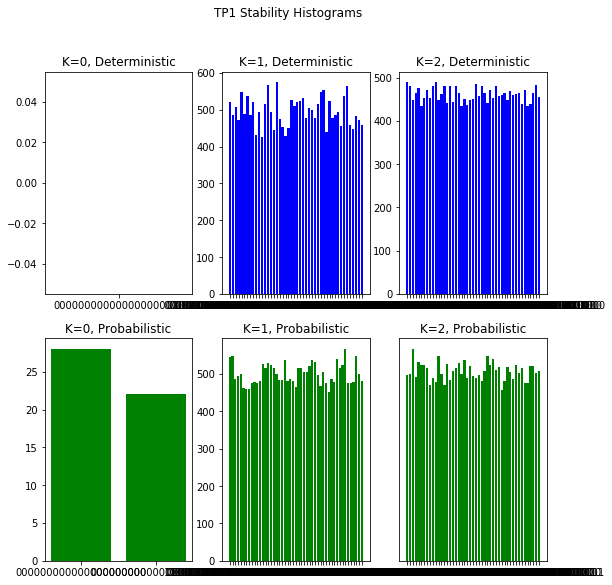

In [17]:
import matplotlib.pyplot as plt #plotting library for python
%matplotlib inline

plt.figure(figsize=(9,9))

plt.subplot(231).title.set_text('K=0, Deterministic')
plt.bar(list(t1_1.keys()), t1_1.values(), color='b')
plt.subplot(232).title.set_text('K=1, Deterministic')
plt.bar(list(t1_2.keys()), t1_2.values(), color='b')
plt.subplot(233).title.set_text('K=2, Deterministic')
plt.bar(list(t1_3.keys()), t1_3.values(), color='b')

plt.subplot(234).title.set_text('K=0, Probabilistic')
plt.bar(list(t2_1.keys()), t2_1.values(), color='g')
plt.subplot(235).title.set_text('K=1, Probabilistic')
plt.bar(list(t2_2.keys()), t2_2.values(), color='g')
plt.subplot(236).title.set_text('K=2, Probabilistic')
plt.bar(list(t2_3.keys()), t2_3.values(), color='g')

plt.suptitle("TP1 Stability Histograms")
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [15]:
test1 = [1,1,1,1,1,1,1,1,1,1]
res = [0]*len(test1)
for i in range(len(test1)):
    for j in range(len(test1)):
        res[i] += 1
print(res)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
